# **Project Name**    - Hotel Booking Analysis



![Picture](https://drive.google.com/uc?export=view&id=1HBn2NgtJ8uqRnhFFSfmXAxndspcKLTsF)


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**Mohit Wagish
##### **Team Member 2 -**Souvik Karmakar
##### **Team Member 3 -**Sunil K

# **Project Summary -**


The analysis of a hotel booking data set can provide valuable insights into customer behavior and booking patterns, and inform data-driven decisions aimed at improving hotel performance and profitability. The data set contains information on a variety of factors that can impact daily rates, such as lead time, number of guests, meal type, country of origin, and market segment.

Lead time, or the number of days between booking and arrival, is a key factor in determining daily rates. Hotels can use this information to optimize their pricing strategies, for example, by offering discounts for early bookings or premium prices for last-minute bookings.

The number of guests staying in the hotel, including adults, children, and babies, can also impact daily rates. This information can help hotels to determine the optimal room and meal offerings to meet the needs of different types of guests.

Meal type is another important factor that can influence daily rates. For example, hotels can offer different pricing for bed and breakfast, half board, and full board options. Understanding the preferences of different market segments and countries of origin can also inform product offerings and marketing strategies.

The distribution channel and deposit type used by guests can also impact daily rates. For example, hotels can offer lower rates for bookings made directly with the hotel, or for bookings made using a non-refundable deposit.

In addition to these factors, the analysis can also provide insights into customer behavior and booking patterns, such as reservation status, customer type, and days in waiting list. For example, hotels can use this information to identify frequent guests and offer loyalty programs, or to manage their inventory of rooms to minimize overbooking or underbooking.

The goal of the analysis is to use the data to inform business decisions that will optimize the hotel's revenue and customer satisfaction. This may involve adjusting pricing strategies, improving product offerings, optimizing marketing and distribution channels, and developing more effective customer relationship management programs.

In conclusion, the analysis of a hotel booking data set can provide valuable insights into customer behavior and booking patterns, and inform data-driven decisions aimed at improving hotel performance and profitability. By leveraging the information contained in the data set, hotels can optimize their pricing strategies, product offerings, marketing and distribution channels, and customer relationship management programs, ultimately leading to increased revenue and customer satisfaction.











# **GitHub Link -**

https://github.com/Souvik-karmakar/Hotel-Booking-Analysis-using-python

# **Problem Statement**


The main aim of looking at the hotel booking data is to better understand how
customers behave. We want to find out trends and patterns in the bookings that can help us make smarter decisions based on data.

By doing this, we hope to improve how well the hotel is doing and make more money. We'll be looking at things like how far in advance people book, how many people are staying, what kind of meals they prefer, where they're from, and what types of bookings they make. We'll also check patterns like how people pay, the status of their reservation, and what kind of customers they are.

The insights we get from all of this will help us set better prices, offer things people want, and improve how we reach customers. Ultimately, our goal is to make more money and make sure customers are happy with their stay at the hotel.

#### **Define Your Business Objective?**

The business objective for the analysis of the hotel booking data set is to gain a deeper understanding of customer behavior, identify trends and patterns in bookings, and inform data-driven decisions aimed at improving hotel performance and profitability. This may involve analyzing factors that impact the daily rate, such as lead time, number of guests, meal type, country of origin, and market segment, as well as booking patterns, such as deposit type, reservation status, and customer type. The insights generated from this analysis could inform pricing strategies, product offerings, marketing and distribution channels, and customer relationship management. The goal is to optimize the hotel's revenue and customer satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Imporing all the necessary libraries
import numpy as np # Numerical operations on arrays and matrices
import pandas as pd #  Data manipulation and analysis
import matplotlib.pyplot as plt #  Data visualization (basic plots).
import seaborn as sns # Statistical data visualization (built on top of Matplotlib).
import missingno as msno # To visualize missing values
%matplotlib inline
import folium # To create interactive leaflet maps directly in your Jupyter
import plotly.express as px # To create a variety of interactive visualizations
! pip install pycountry


###To view all columns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
plt.style.use('ggplot')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
hotel_bookings_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
# Copying the date set
h_df=hotel_bookings_df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
h_df.sample(n=5) #selected values randomly

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
97413,City Hotel,0,55,2016,September,38,15,0,1,2,1.0,0,BB,NZL,Online TA,TA/TO,0,0,0,A,B,1,No Deposit,9.0,NaN,0,Transient,152.10,0,1,Check-Out,9/16/2016
470,Resort Hotel,0,48,2015,July,29,17,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,F,0,No Deposit,196.0,NaN,0,Transient,123.00,0,0,Check-Out,7/19/2015
84928,City Hotel,0,30,2016,March,10,4,0,2,1,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,77.50,0,0,Check-Out,3/6/2016
37103,Resort Hotel,0,251,2017,May,22,31,2,5,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,C,1,No Deposit,177.0,NaN,0,Transient,74.25,0,1,Check-Out,6/7/2017
4413,Resort Hotel,1,85,2016,March,12,14,3,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,59.40,0,0,Canceled,1/5/2016


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
h_df.shape #having approx 1.2 lakh rows and 32 columns

(119390, 32)

### Dataset Information

On the basis of info, it is there are some missing values and different data types can be seen

In [ ]:
# Dataset Info
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Calculating the counts for each relevant columns
print(h_df.hotel.value_counts())
print()
print(h_df.meal.value_counts())
print()
print(h_df.market_segment.value_counts())
print()
print(h_df.distribution_channel.value_counts())
print()
print(h_df.deposit_type.value_counts())
print()
print(h_df.reservation_status.value_counts())


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
h_df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

####**Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
h_df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

####We will eliminate the "company" column from our further analysis as it has a large number of Null values that will negatively affect our ability to analyze the data further.


<Axes: title={'center': 'Percentage of Missing Values per feature'}>

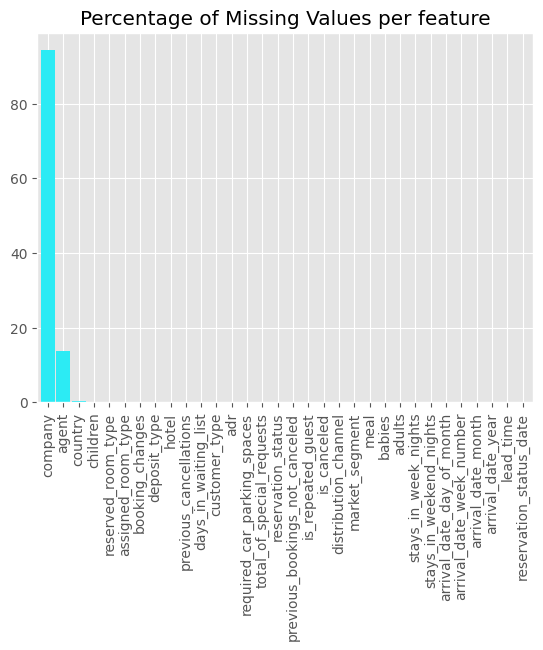

In [ ]:
# Visualizing the missing values
null_counts=h_df.isna().sum().sort_values(ascending=False)
percent_missing=null_counts/len(h_df)*100

# Plot the missing values as a bar chart
percent_missing.plot(kind="bar",stacked=True,title="Percentage of Missing Values per feature",x="Features",y="Percentage of Missing Values",color='#2cebf4',width=0.9)

### What did you know about your dataset?

#**Hotel Distribution**:

City Hotel: 79,330 bookings
Resort Hotel: 40,060 bookings
This indicates that the dataset consists of a larger proportion of bookings for City Hotels compared to Resort Hotels.

Meal Preferences:

BB (Bed & Breakfast): 92,310 bookings
HB (Half Board): 14,463 bookings
SC (Self Catering): 10,650 bookings
Undefined: 1,169 bookings
FB (Full Board): 798 bookings
Most guests prefer Bed & Breakfast (BB) meal plans, while Undefined values and Full Board (FB) are less common.

Market Segment:

Online TA: 56,477 bookings
Offline TA/TO: 24,219 bookings
Groups: 19,811 bookings
Direct: 12,606 bookings
Corporate: 5,295 bookings
Complementary: 743 bookings
Aviation: 237 bookings
Undefined: 2 bookings
The majority of bookings are made through Online Travel Agencies (Online TA), followed by Offline TA/TO and Groups.

Distribution Channel:

TA/TO (Travel Agents/Tour Operators): 97,870 bookings
Direct: 14,645 bookings
Corporate: 6,677 bookings
GDS (Global Distribution System): 193 bookings
Undefined: 5 bookings
The most common distribution channel is TA/TO, with a substantial number of bookings made through Travel Agents/Tour Operators.

Deposit Type:

No Deposit: 104,641 bookings
Non-Refundable: 14,587 bookings
Refundable: 162 bookings
The majority of bookings do not require a deposit.

Reservation Status:

Check-Out: 75,166 bookings
Canceled: 43,017 bookings
No-Show: 1,207 bookings
A significant portion of bookings results in guests checking out, while a smaller number is canceled or marked as No-Show.

The hotel booking dataset can provide valuable insights into various aspects of hotel operations and customer behavior. Some key information that can be obtained from this dataset include:

Booking patterns: The data can provide information on when and how guests are booking rooms, including lead time, arrival date and day of the week, and deposit type. This information can be used to identify booking trends and patterns, and inform pricing and inventory management strategies.

Guest demographics: The data contains information on the number of guests, including adults, children, and babies, as well as the country of origin, market segment, and customer type. This information can be used to understand the needs and preferences of different types of guests, and inform product offerings and marketing strategies.

Room and meal preferences: The data includes information on the reserved and assigned room types, as well as the meal type selected by guests. This information can be used to understand the preferences of different types of guests, and inform room and meal offerings.

Reservation status: The data includes information on the reservation status of each booking, including canceled and non-canceled bookings, as well as the number of previous cancellations and bookings. This information can be used to understand the reasons behind cancellations and inform customer relationship management strategies.

Pricing and revenue: The data includes information on the daily rate charged to guests, as well as the number of days in waiting list, and the deposit type. This information can be used to understand the factors that impact pricing and revenue, and inform pricing strategies.

Overall, the hotel booking dataset can provide valuable insights into a wide range of hotel operations, from booking patterns and guest demographics, to room and meal preferences, reservation status, and pricing and revenue. This information can be used to inform data-driven decisions aimed at improving hotel performance and profitability.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(h_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Dataset Describe
h_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Variables Description

***Categorical Variables***
(Ordinal):

meal: Represents meal plans. Ordinal because there is likely an order or hierarchy among the meal types (e.g., 'BB' before 'HB' in terms of inclusiveness).

market_segment: Represents market segments. Different categories likely represent distinct groups.

distribution_channel: Represents distribution channels. Different categories represent different channels for booking.

deposit_type: Represents deposit types. Different categories represent different deposit policies.

reservation_status: Represents reservation status. Different categories represent different stages of the reservation process.

hotel: Represents the type of hotel (City Hotel or Resort Hotel). While there are only two categories.

arrival_date_year: Represents the year of arrival. While expressed as numbers, it is categorical as the years do not have a numerical relationship.

market_segment: This variable represents different segments, and the categories.

adults, children, babies: Represents the counts of adults, children, and babies respectively.

agent, company: Categorical.

required_car_parking_spaces, total_of_special_requests: Categorical.

***Continuous Variables***:

stays_in_weekend_nights: Represents the number of nights stayed over weekends.

days_in_waiting_list: Represents the number of days a booking was in the waiting list.

adr: Represents the average daily rate.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
h_df.nunique().sort_values(ascending=False)

adr                               8879
reservation_status_date            926
lead_time                          479
company                            352
agent                              333
country                            177
days_in_waiting_list               128
previous_bookings_not_canceled      73
arrival_date_week_number            53
stays_in_week_nights                35
arrival_date_day_of_month           31
booking_changes                     21
stays_in_weekend_nights             17
previous_cancellations              15
adults                              14
arrival_date_month                  12
assigned_room_type                  12
reserved_room_type                  10
market_segment                       8
total_of_special_requests            6
distribution_channel                 5
meal                                 5
babies                               5
children                             5
required_car_parking_spaces          5
customer_type            

## 3. ***Data Wrangling***

## Data Cleaning

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

Steps used for data Cleaning: \

Remove duplicate rows \
Handling missing values. \
Adding important columns.

#### Dropping values which don't seem relevant for our study.

###Adding important columns.

In [ ]:
# Changing data types of reservation_status_date from object to datetime

h_df['reservation_status_date'] = pd.to_datetime(h_df['reservation_status_date'])

# Adding total staying days in hotels
h_df['Total_Duration'] = h_df['stays_in_weekend_nights']+h_df['stays_in_week_nights']

# Adding Total_Guest num as column, i.e. total people num = num of adults + children + babies
h_df['Total_Guest'] = h_df['adults']+h_df['children']+h_df['babies']





In [ ]:
h_df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [ ]:
#using pycountry module
import pycountry


#function to change country code to country name
def get_country_name(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
        else:
            return 'others'
    except LookupError:
        return 'others'


country_name = get_country_name(country_code)
print(f"The country name for code {country_code} is: {country_name}")


# Create a new column 'country_name' with country names
h_df['country_name'] = h_df['country'].apply(get_country_name)

The country name for code XYZ is: others


In [ ]:
h_df['country_name']

0               Portugal
1               Portugal
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
119385           Belgium
119386            France
119387           Germany
119388    United Kingdom
119389           Germany
Name: country_name, Length: 119390, dtype: object

###Dropping duplicate and irrelevant rows

In [ ]:
# Write your code to make your dataset analysis ready.
h_df.drop_duplicates(inplace=True)

#As the company column contains more than 90% missing value we can drop that column
h_df.drop(['company','country'],axis=1,inplace=True)

#we have added Total_Duration and Total_Guest columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.
h_df.drop(['adults', 'children','babies'], axis=1,inplace=True)


# removing rows which contain total guests as Zero.
h_df= h_df[h_df.Total_Guest > 0]


###Handling Missing values

In [ ]:
# Impute the missing values with the mean in the agent column
h_df.agent.fillna(h_df['agent'].mean(), inplace=True)

In [ ]:
# Checking the count of null values in remaining columns.
h_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
Total_Duration              

### What all manipulations have you done and insights you found?

1.Dropping the 'company' Column:

 Removed the 'company' column from the DataFrame (h_df) as it contained more than 90% missing values. This decision was made to streamline and simplify the dataset by eliminating a column with insufficient data.

2.Imputing Missing Values in the 'country' Column:

Filled the missing values in the 'country' column with the label 'Others'. This was done to handle missing data in a categorical column by providing a placeholder value for countries with missing information.

3.Imputing Missing Values in the 'children' Column:

Filled the missing values in the 'children' column with 0. This decision was made to handle missing data in a numerical column, assuming that a missing value in this context implies no children.

4.Imputing Missing Values in the 'agent' Column with the Mean:

Filled the missing values in the 'agent' column with the mean value of the non-missing values in that column. This imputation strategy is used to replace missing numerical data with a representative value.

5.Dropping the 'adults' and 'children' column:

Removed the 'adults','children'and 'babies' column by added one new column 'Total_Guests' = 'adults' + 'children' +'babies' . Also we removed the rows under Total_Guests which contain as zero.



## ***4.EDA Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Uni-Variate** **Analysis**

#### Chart - 1  Food Distribution



In [ ]:
# Chart - 1 (Pie-Chart)
import plotly.express as px
# Count the occurrences of each food type
food_distribution = h_df['meal'].value_counts().reset_index()

# Create a pie chart
fig = px.pie(food_distribution, names='index', values='meal', title='Food Distribution')

# Customize the figure size
fig.update_layout(
    title_text='Food Distribution',
    width=800,    # Set the width of the figure
    height=600,   # Set the height of the figure
    paper_bgcolor='white',  # Set the background color
    plot_bgcolor='black'
)

fig.show()

1. Why did you pick the specific chart?

  Answer:-The pie chart was chosen for exploring the distribution of meal plans because it effectively illustrates the frequency of each meal plan category, making it easy to compare and identify the most commonly chosen meal plans.

2. What is/are the insight(s) found from the chart?

  Answer:- The chart visually represents the distribution of meal types, showcasing the proportion of each type in the dataset.

  from the chart we  can easily identify 'BB' meal type dominates the dataset among others.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Answer:-
Positive Impacts:

 If one meal type dominates the distribution, the business can optimize resources, inventory, and marketing efforts accordingly.
 Understanding the popular meal types can help in tailoring promotions or menu offerings to better meet customer preferences.

 Negative Growth Insights:

 If there's a significant lack of diversity in meal types, it might indicate a limited menu or a need for diversification to attract a broader customer base.
 If a specific meal type has a declining trend, it could be a signal to investigate and improve the quality or appeal of that meal.

###Chart-2 (Distribution of Lead Time)

In [ ]:
# Uni-Variate Analysis
# Chart-2 (Histogram for numerical variables)
# Histogram for Lead Time
#Using Plotly
import plotly.express as px
fig = px.histogram(h_df, x='lead_time', nbins=30, title='Distribution of Lead Time', labels={'lead_time': 'Lead Time'})
fig.update_layout(
    title_text='Distribution of Lead Time',
    paper_bgcolor='white',  # Set the background color
    #plot_bgcolor='black',    # Set the plot area background color
    width=1200,    # Set the width of the figure
    height=600    # Set the height of the figure
)
# Customize the bar color
fig.update_traces(marker_color='green')
fig.show()

**1.Why did you pick the specific chart?**

Ans:-The specific chart chosen is a histogram for lead time. Histograms are effective for visualizing the distribution of a numerical variable, providing insights into the frequency of different values and the overall shape of the data. This type of chart is suitable for exploring the distribution of lead time in hotel bookings.

**2.What is/are the insight(s) found from the chart?**

Ans:-The histogram visualizes the distribution of lead time in hotel bookings. Insights that can be gained include: Lead Time Distribution: It shows the concentration of lead time values, indicating whether most bookings are made well in advance or closer to the arrival date. Common Lead Time Intervals: Peaks or clusters in the histogram reveal common lead time intervals chosen by customers. Outliers: Outlying values in the tails of the distribution may indicate rare scenarios where bookings are made unusually early or late.


**3.Will the gained insights help creating a positive business impact?**

Ans:-Yes, the gained insights can have a positive business impact. For example:

Optimized Operations: Understanding lead time distribution can help optimize hotel operations, staffing, and resource allocation based on common booking patterns.

Marketing Strategy: Insights into lead time preferences can inform marketing strategies, allowing hotels to target customers at specific intervals with promotions or special offers.



**4.Are there any insights that lead to negative growth? Justify with specific reason.**

Ans:-Negative growth might be observed if the lead time distribution indicates a significant concentration of last-minute bookings. This could pose challenges such as:

Revenue Instability: A high concentration of last-minute bookings may lead to revenue instability as customers booking closer to the arrival date might negotiate lower rates.

Operational Challenges: Last-minute bookings can strain hotel resources, impacting room availability, staff scheduling, and overall operational efficiency. However, it's important to note that negative growth is context-dependent, and strategies can be devised to mitigate challenges associated with specific lead time patterns. Adjustments to pricing strategies, marketing efforts, and operational planning can help address potential negative impacts.

###Chart-3( Market segment wise bookings)

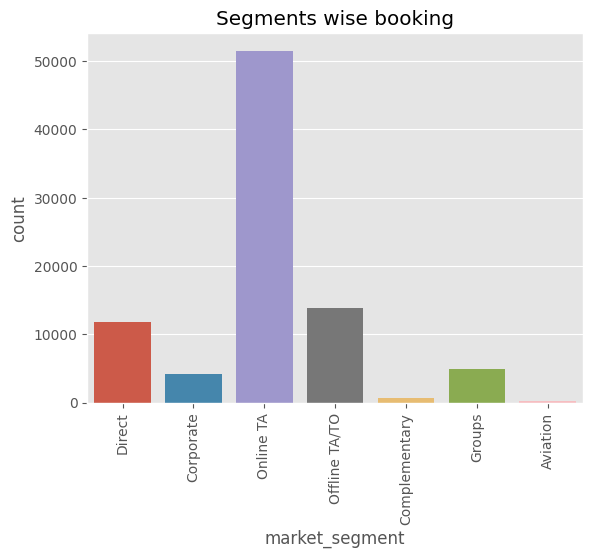

In [ ]:
#Market segment wise bookings
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = h_df)
plt.xticks(rotation = 90)
plt.show()

### **Insight**:-

Indirect bookings through online and offline travel agents are higher compared to direct bookings and same is the case with group bookings which are also high.



#### Chart - 4 Hotel Type Distribution





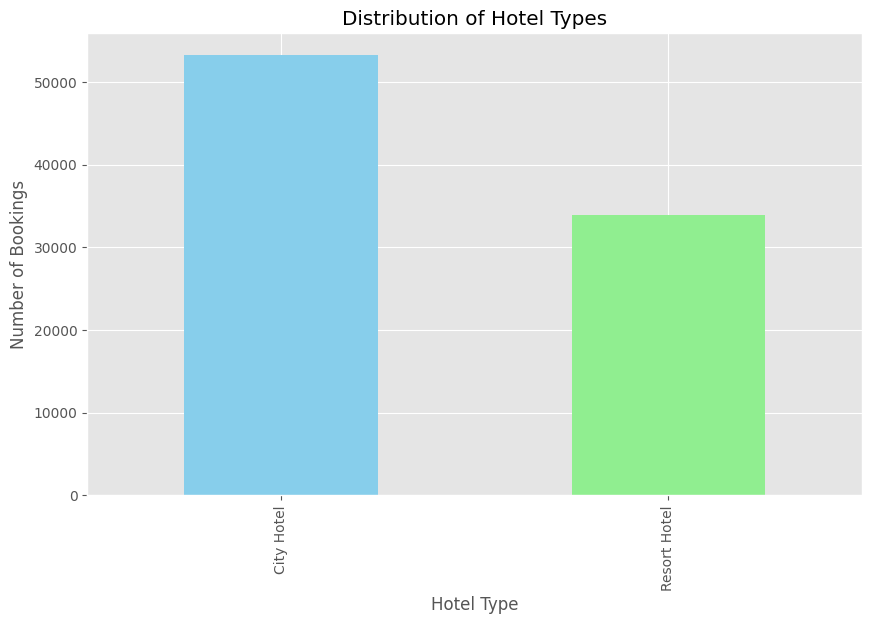

In [ ]:
# visualization code
# Count the occurrences of each hotel type
hotel_type_distribution = h_df['hotel'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
hotel_type_distribution.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()


##### 1. Why did you pick the specific chart?

The 'hotel' column represents nominal categorical data, where the two categories (City Hotel and Resort Hotel) have no inherent order. Bar charts are effective for visualizing the distribution of nominal categorical variables.

##### 2. What is/are the insight(s) found from the chart?

The Hotel Type Distribution chart reveals that City Hotels have significantly more bookings compared to Resort Hotels, indicating a higher demand or preference for City Hotels in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that City Hotels have more bookings can lead to 1.targeted marketing efforts,
2.revenue optimization through adjusted pricing and services, 3.enhanced operational efficiency,
4.improved customer experiences tailored to City Hotel guests, 5.strategic planning for expansion or investment, and a competitive advantage in the marketplace.
Leveraging these insights has the potential to positively impact business outcomes.

**Limitations**
While the popularity of City Hotels can bring positive outcomes, it may lead to challenges such as
1.overcrowding,
2.resource strain,
3.limited diversification,
4.market saturation,
5.missed opportunities in the resort segment,
6.vulnerability to external factors, and risks associated with shifts in consumer preferences and travel trends.
7.Careful strategic planning and adaptability are essential to navigate these potential negative impacts and sustain long-term growth.

##**Bi-Variate Analysis:-**

### **Chart - 5** Distribution of adr and Total_Duration

###Let's examine whether the duration of stay has an impact on the ADR.

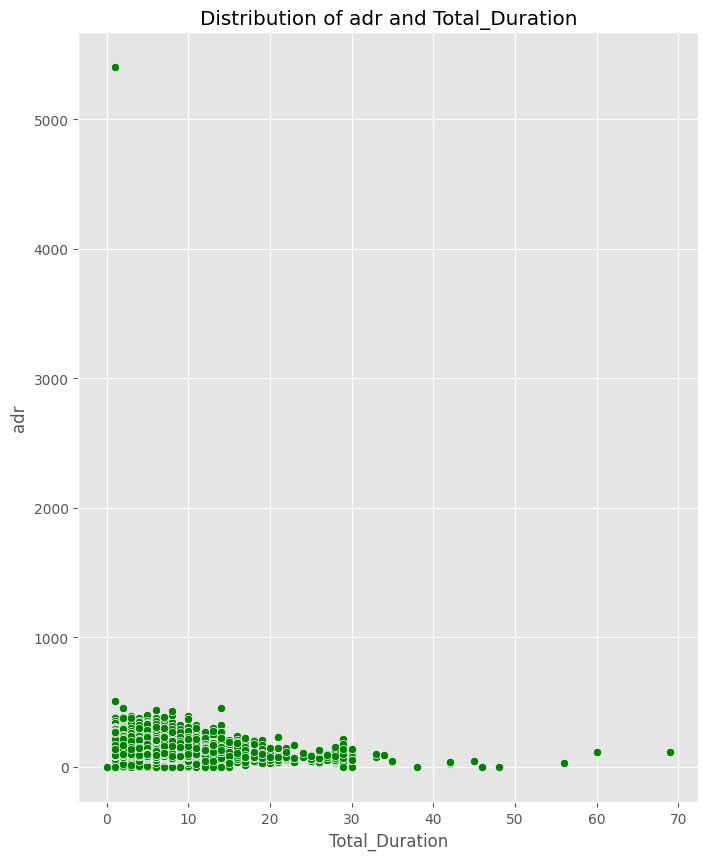

In [ ]:
plt.figure(figsize = (8,10))
# Using Seaborn scatterplot for visualization
sns.scatterplot(x = 'Total_Duration',y = 'adr', data = h_df,color='green')
plt.title("Distribution of adr and Total_Duration")
#show the plot
plt.show()

In [ ]:
# Removing the outlier
h_df.drop(h_df[h_df['adr'] > 5000].index, inplace = True)

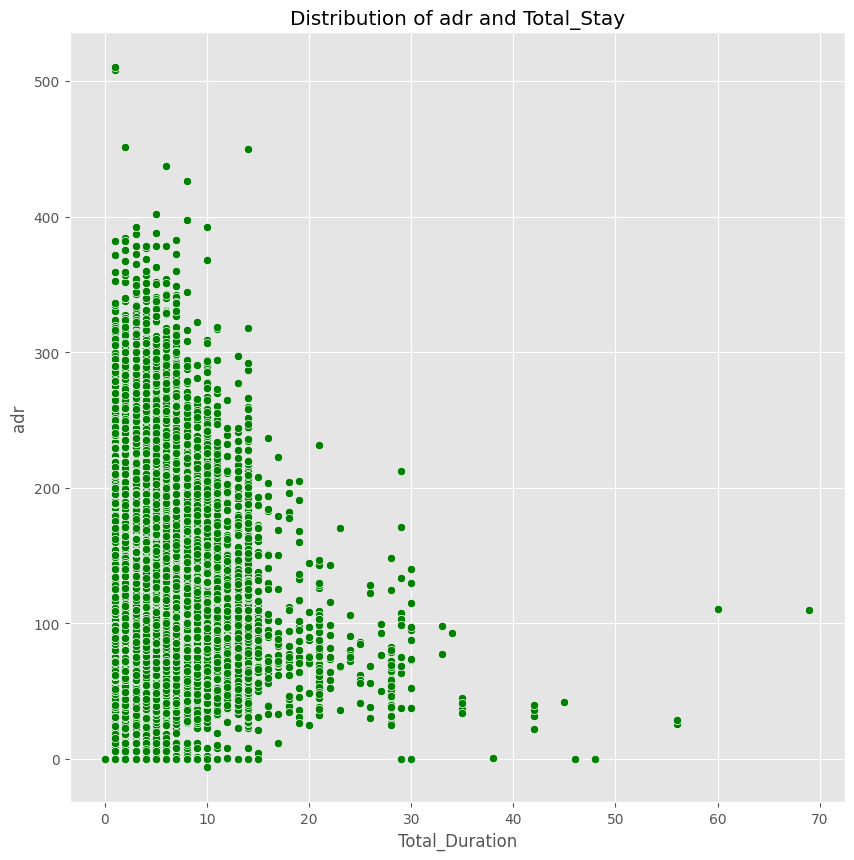

In [ ]:
plt.figure(figsize = (10,10))
# Using Seaborn Scatterplot for visualization
sns.scatterplot(x = 'Total_Duration',y = 'adr', data = h_df,color='green')
plt.title("Distribution of adr and Total_Stay")
#show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer:-We have used scatter plot to see the correlation between Total_stay and adr,and also we determined how Total_stay impacts adr.

##### 2. What is/are the insight(s) found from the chart?

We can observe from the scatter plot that the adr falls as the length of Total_Duration grows. This implies that a better offer for the customer can be finalized for a longer stay. In practical terms, as the ADR decreases, the Total Duration tends to increase, and vice versa.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-
Positive Insights:

Correlation Identification: If there is a clear correlation between adr and Total_Duration, the hotel can identify patterns in pricing based on the length of stay. This insight can be used to optimize pricing strategies.
Revenue Optimization: Understanding how adr varies with the total duration allows the hotel to optimize revenue by adjusting pricing strategies for different lengths of stay.

Negative Insights:

Outlier Removal:
The code includes the removal of adr outliers greater than 5000. While outliers can distort the analysis, removing them might lead to potential loss of information. It's essential to carefully consider the impact of outlier removal on the overall analysis.

Impact of High adr Values: If the scatter plot shows clusters of high adr values for shorter stays, it might indicate a pricing strategy that could discourage shorter stays. This may negatively impact bookings for short-duration customers.

Considerations for Negative Growth:

Customer Attraction: If the analysis reveals that high adr values are associated with shorter stays, it's important to consider the potential negative impact on customer attraction. High prices for short stays may discourage potential customers, leading to a negative impact on bookings.
Competitive Pricing: Understanding how competitors price their offerings for different durations can help ensure the hotel remains competitive. If the hotel's pricing strategy is significantly higher than competitors for similar durations, it may lead to negative growth.

Overall Impact:

The gained insights can positively impact business by optimizing pricing strategies based on the length of stay, leading to increased revenue for the hotel.
Careful consideration is needed regarding the removal of outliers, as it may affect the analysis. Outliers might represent unique booking scenarios that, if properly understood, could contribute to positive growth opportunities.

###**Chart-6**  Lead Time Vs Is_Cancelled

####How do lead time and cancelation relate to each other?

<Axes: xlabel='lead_time', ylabel='mean'>

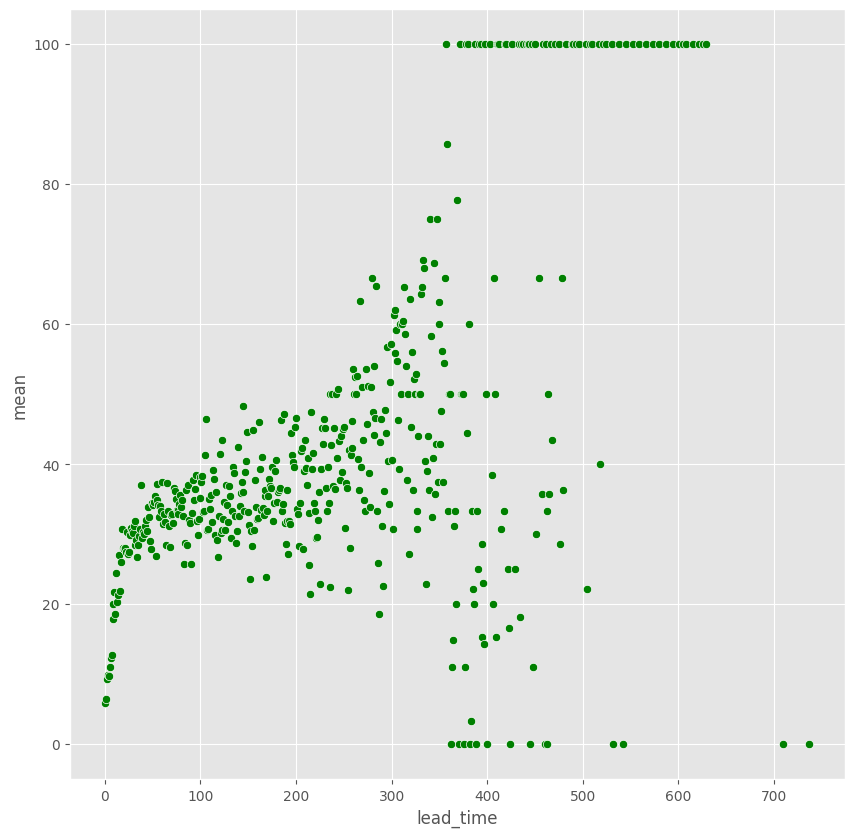

In [ ]:
# grouping by lead time
fig1= h_df.groupby("lead_time")['is_canceled'].describe()
# Using Seaborn scatterplot  for visualization
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=fig1.index, y=fig1["mean"] * 100,color='green')

So from the above plot we can easily say that Lead time has a positive correlation with cancellation.

##### 1. Why did you pick the specific chart?

Answer:-We have used scatter plot to check the relation between lead time and cancellation.

##### 2. What is/are the insight(s) found from the chart?

Answer:- it suggests that as the lead time (the time between booking and the actual stay) increases, the likelihood of cancellations also increases. In other words, there is a tendency for customers who book farther in advance to be more likely to cancel their reservations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-

Positive Business Impact:

Strategic Planning for High Lead Times: Understanding the positive correlation between lead time and cancellations allows hotels to strategically plan for periods with longer lead times. This may involve implementing flexible cancellation policies or targeted marketing to encourage more concrete bookings during high lead time periods.

Resource Allocation: Hotels can optimize resource allocation based on lead time trends. For instance, during periods with longer lead times, staff and services may be adjusted to accommodate potential cancellations.

Marketing and Promotions: The insights gained can inform marketing strategies, allowing hotels to design promotions or incentives that address the booking behavior associated with longer lead times. This could include special offers for early bookings to reduce the likelihood of cancellations.

Considerations for Negative Growth:

Revenue Loss Mitigation: Longer lead times leading to cancellations can potentially result in revenue loss. Hotels need to implement measures to mitigate this loss, such as offering non-refundable bookings or requiring partial prepayment for reservations with extended lead times.

Customer Communication: Transparent communication becomes crucial. Hotels should clearly communicate cancellation policies and any penalties associated with cancellations to manage guest expectations and minimize dissatisfaction.

Impact on Occupancy Rates: Higher cancellations due to extended lead times may impact overall occupancy rates. Hotels need to monitor and adjust room availability and pricing strategies accordingly to mitigate potential negative effects on revenue.

In conclusion, while the positive insights can lead to strategic decision-making and enhanced customer satisfaction, the potential negative impacts on revenue and occupancy rates highlight the importance of implementing effective strategies to mitigate these challenges. Clear communication and flexibility in policies are key components of successfully navigating the dynamics between lead time and cancellations.








### **Chart - 7** Price fluctuation over the year analysis

To what extent do hotel prices fluctuate over the year?


In [ ]:
# visualization code
h_df['adr_vary']= h_df.adr/h_df.Total_Guest
adr_monthly_df= h_df.groupby (['hotel','arrival_date_month'])['adr_vary'].mean().reset_index()

adr_monthly_df

,hotel,arrival_date_month,adr_vary
0,City Hotel,April,59.935829
1,City Hotel,August,58.623175
2,City Hotel,December,47.904760
3,City Hotel,February,49.010753
4,City Hotel,January,49.638690
5,City Hotel,July,57.270408
6,City Hotel,June,66.816255
7,City Hotel,March,51.960651
8,City Hotel,May,71.652128
9,City Hotel,November,56.715607


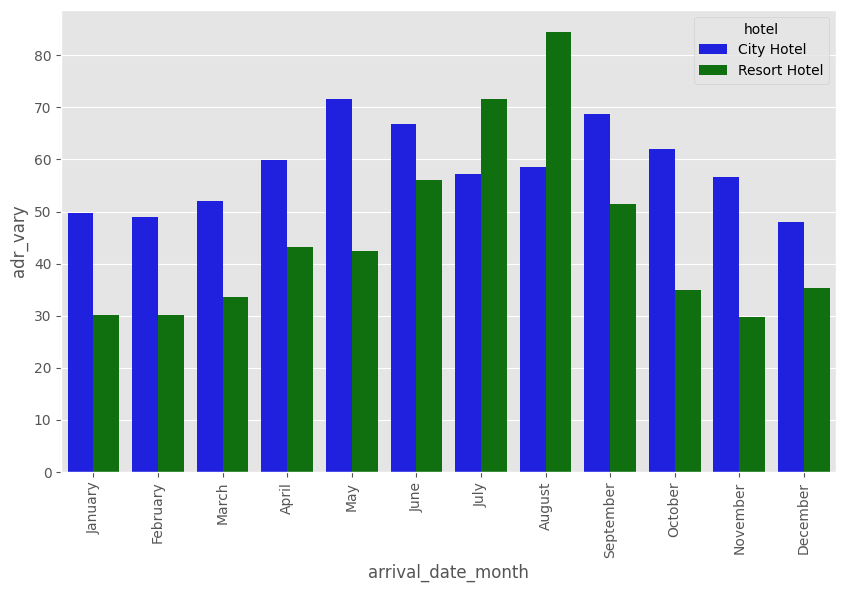

In [ ]:
plt.figure(figsize=(10, 6))
month_sort = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Use hue_order to specify the order of the 'hotel' variable
sns.barplot(x='arrival_date_month', y='adr_vary', data=adr_monthly_df, hue='hotel', order=month_sort, palette={'City Hotel': 'blue', 'Resort Hotel': 'green'})

# Beautification
plt.xticks(rotation=90)

#Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer:-I picked a grouped bar chart for the following reasons:

Comparison Across Categories: Grouped bar charts are well-suited for comparing multiple categories (hotels) across different subcategories (months) in a visually intuitive way.

Visualizing Variation: Bar charts are effective for visualizing variations in a numerical variable (ADR) across different groups, providing a clear representation of how values change over time.

Interpretation of Trends: The chart allows for easy interpretation of trends and patterns in ADR for each hotel type over the months.
The chosen visualization method enables a quick and informative comparison of ADR variations between the two hotel categories across different months.

##### 2. What is/are the insight(s) found from the chart?

Answer:-The chart provides insights into the average daily rate variation for each hotel type over the months.

It allows for the identification of months with significant ADR fluctuations and the comparison of these fluctuations between the two hotel categories.
Patterns or trends in ADR variations can be easily observed, providing valuable insights into the seasonal patterns of pricing.

From the above plot we can see that in the month of august Resort hotel has more price flactuation and on themonth of may City hotel has more price flactuation.

##### 3. Will the gained insights help creating a positive business impact?


Answer:-Yes, the gained insights can contribute to positive business impact:

Pricing Strategy Optimization: Understanding how ADR fluctuates over the year allows for the optimization of pricing strategies based on demand trends during specific months.

Revenue Management: Hotels can adjust their revenue management strategies to capitalize on high-demand months and implement targeted promotions during low-demand periods.

4. Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-Negative growth might be observed if the ADR variations reveal consistently unfavorable patterns:

Consistent Decline in ADR: If there is a consistent decline in ADR over several months, it might indicate a pricing strategy that is not aligned with market demand, potentially leading to negative growth.

Inability to Capitalize on Peak Months: If the ADR does not reflect the expected increase during peak-demand months, it could result in missed revenue opportunities and negative growth.

#### Chart - 8 Distribution of Market Segments by Hotel Type


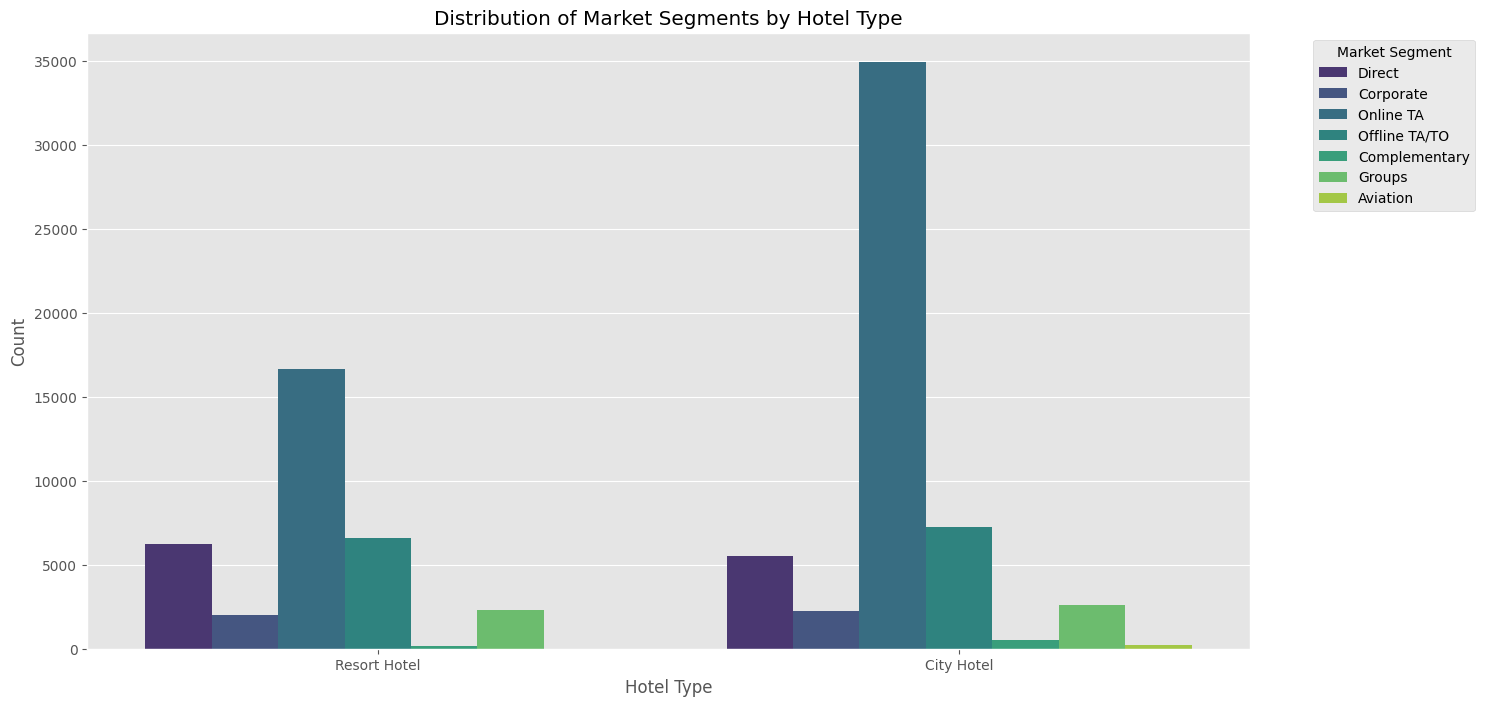

In [ ]:
# Clustered Bar charts
# Categorical vs. Categorical
fig_stacked_bar = plt.figure(figsize=(15, 8))
# Using Seaborn countplot for visualization
sns.countplot(x='hotel', hue='market_segment', data=h_df,palette='viridis')
# Beautify the plot
plt.title('Distribution of Market Segments by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Market Segment', loc='upper right', bbox_to_anchor=(1.2, 1))
#Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer:- I chose a clustered bar chart because it allows for the visual comparison of the distribution of market segments with respect to each hotel type. Each hotel type is represented as a separate cluster of bars, and within each cluster, bars are grouped by market segment.

##### 2. What is/are the insight(s) found from the chart?

Answer:- The chart provides insights into how market segments are distributed across different hotel types. It allows us to compare the popularity of various market segments within each hotel category.

##### 3. Will the gained insights help creating a positive business impact?


Answer:- Yes, the gained insights can positively impact business decisions. For example:
Targeted Marketing: Understanding which market segments are more prevalent in each hotel type can guide targeted marketing strategies. Hotels can tailor promotional efforts to attract specific types of guests associated with high demand.

####4.Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- Negative growth may be observed if the distribution of market segments reveals an overreliance on a particular segment that is less profitable or prone to cancellations. For instance:

Risk of Dependence: If a hotel relies heavily on a market segment with a high cancellation rate or low spending capacity, it may lead to revenue instability and negative growth. Diversification of market segments might be a strategy to mitigate such risks.

#### **Chart - 9** Booking Canceled or not Vs Deposit type

Text(0, 0.5, 'Count')

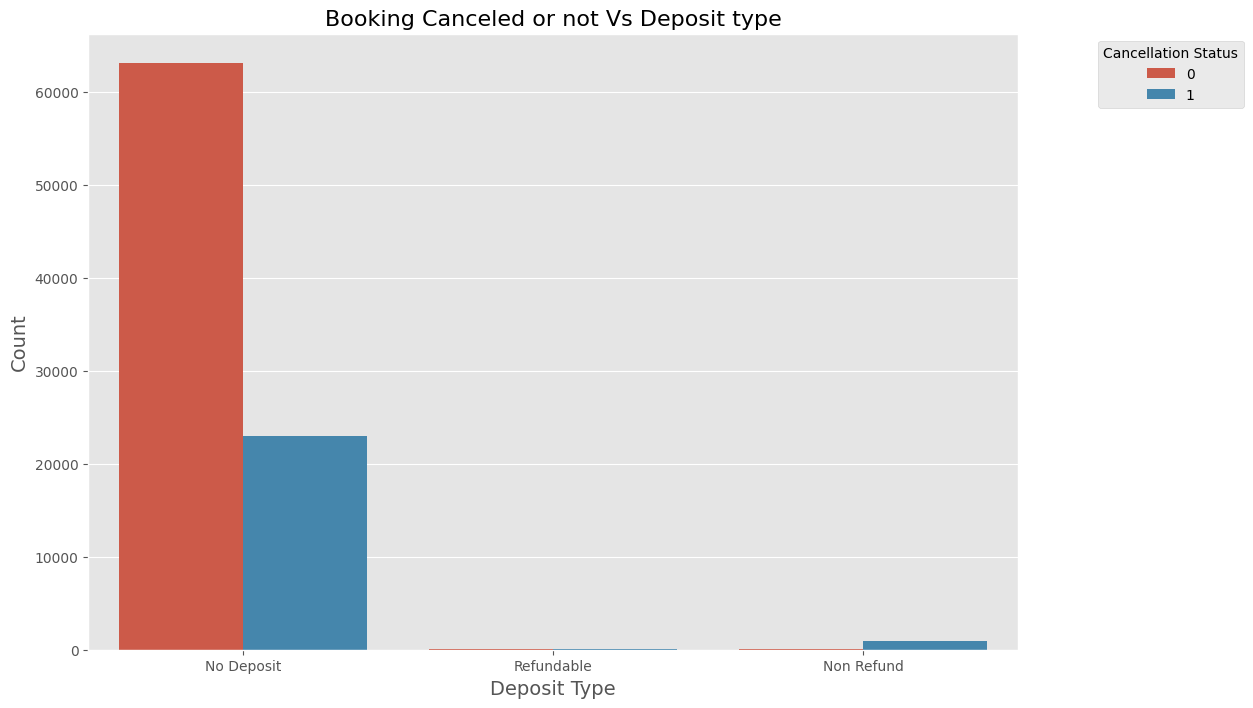

In [ ]:
#Count Plot
#Booking Canceled or not Vs Deposit type
plt.figure(figsize=(12,8))
# Using Seaborn countplot for visualization
sns.countplot(x='deposit_type',data=h_df ,hue='is_canceled')
# Beautify the plot
plt.legend(title='Cancellation Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title("Booking Canceled or not Vs Deposit type", fontsize=16)
plt.xlabel("Deposit Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
#show the plot
plt.show()

We can infer from the plot above that about 25% of reservations were canceled by customers with No Deposit. It follows that visitors who make reservations without paying a deposit are probably going to cancel more of them. Surprisingly, non-refundable deposits experienced a higher rate of cancellation than refundable deposits. Given that hotel rates are typically higher for rooms with refundable deposits and that customers pay more in anticipation of cancellation, it would make sense to assume that refundable deposits have higher cancellation rates.


##### 1. Why did you pick the specific chart?

Answer:- The chosen chart, a count plot comparing booking cancellations across different deposit types, is suitable for visualizing categorical data. It effectively shows the distribution of cancellations within each deposit type, making it easy to compare and analyze.

##### 2. What is/are the insight(s) found from the chart?

Answer:-Cancellation Rates:

No Deposit: Around 25% of reservations were canceled by customers with no deposit.

Non-Refundable Deposits: Surprisingly, non-refundable deposits experienced a higher rate of cancellation than refundable deposits.

##### 3. Will the gained insights help creating a positive business impact?


Answer:-Yes, the gained insights can contribute to positive business impact:

Positive Business Impact:

Optimizing Policies:

Understanding the higher cancellation rates for no deposits and non-refundable deposits can help in optimizing cancellation policies.
The hotel can consider incentivizing customers to choose refundable deposits or provide additional value to those making reservations without a deposit to reduce cancellations.

Revenue Management:

Knowledge of cancellation rates for different deposit types can contribute to effective revenue management strategies.
The hotel can adjust pricing or promotions to encourage bookings with refundable deposits, potentially leading to increased revenue.

Considerations for Negative Growth:
Risk Assessment:

The higher cancellation rate for non-refundable deposits may impact revenue negatively.

The hotel should carefully assess the risk associated with this deposit type and explore strategies to mitigate cancellations, such as clear communication of policies during the booking process.

Customer Experience:

If non-refundable deposits have a higher cancellation rate, it may affect customer satisfaction.
The hotel may need to improve communication or offer additional incentives to enhance the overall customer experience.

#####4. Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-Negative growth might occur if the box plot reveals unfavorable trends, such as:

Wide Variability: If there is significant variability in ADR within a hotel category, it may indicate inconsistency in pricing or customer dissatisfaction, potentially leading to negative growth.

High Outliers: If there are frequent high outliers, it may suggest occasional instances of extremely high ADR, which could deter certain customer segments and impact overall growth negatively.

#### **Chart - 10** Cancellation Rate vs Customer Type

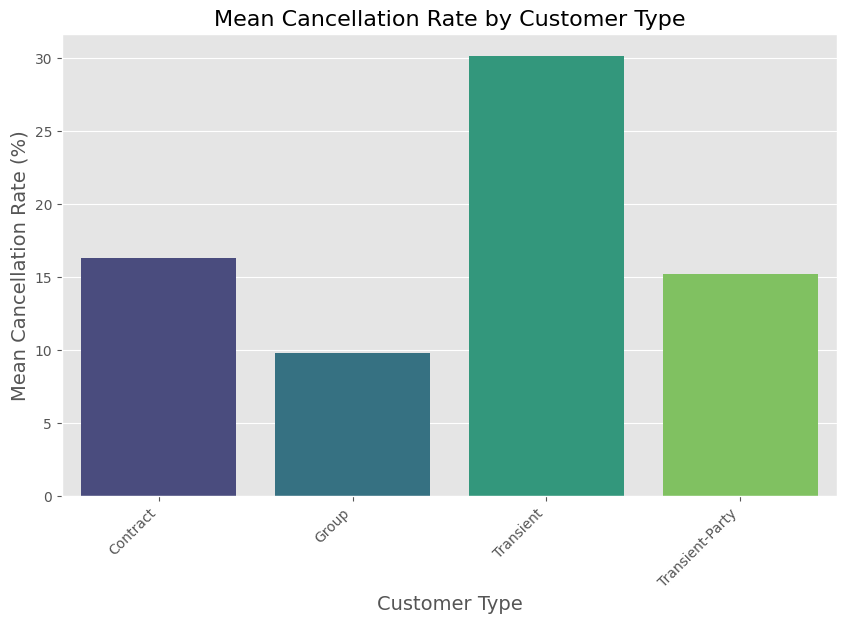

In [ ]:
# Chart - 8 visualization code

# Group by 'customer_type' and calculate mean cancellation rate
cancellation_rate_by_customer = h_df.groupby("customer_type")['is_canceled'].mean() * 100

# Using Seaborn barplot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate_by_customer.index, y=cancellation_rate_by_customer.values, palette="viridis")

# Beautify the plot
plt.title('Mean Cancellation Rate by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Mean Cancellation Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


####From the above plot we can say that **Transient** customer types have higher cancellations.

##### 1. Why did you pick the specific chart?

Answer:-The specific chart chosen is a bar chart. A bar chart is suitable for visualizing the mean cancellation rate for different customer types. It provides a clear comparison of cancellation rates among various customer types using horizontal bars.

##### 2. What is/are the insight(s) found from the chart?

Answer:-The bar chart shows the mean cancellation rate (expressed as a percentage) for different customer types. Insights that can be gained include:

Cancellation Rates: It reveals how cancellation rates vary across customer types.

Customer Type Comparison: Provides a direct comparison between different customer types in terms of their likelihood to cancel bookings.

Identification of High-Risk Customer Types: Highlights customer types with higher cancellation rates, which can be important for targeted strategies.

##### 3. Will the gained insights help creating a positive business impact?

Answer:-Yes, the gained insights can help in creating a positive business impact.

For example:

Targeted Marketing: Understanding which customer types have higher cancellation rates allows for more targeted marketing efforts. Special promotions, loyalty programs, or personalized incentives can be designed to retain customers with a higher likelihood of cancellation.

Optimized Resource Allocation: Hotels can optimize resource allocation, such as staffing and room planning, based on the expected cancellation behavior of different customer segments.

4. Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-Negative growth might be observed if the analysis reveals that a significant portion of high-value customer types has a higher cancellation rate.
For example:

Loss of High-Value Customers: If a premium or loyal customer segment has a higher cancellation rate, it could lead to negative growth as the hotel might lose revenue from these valuable customers.

Impact on Reputation: High cancellation rates in specific customer segments could impact the hotel's reputation, as frequent cancellations may lead to dissatisfaction and negative reviews.

#### **Chart - 11** MarketSegment Vs Booking Cancelled or not

Text(0.5, 1.0, 'Booking Canceled or not Vs  market segment')

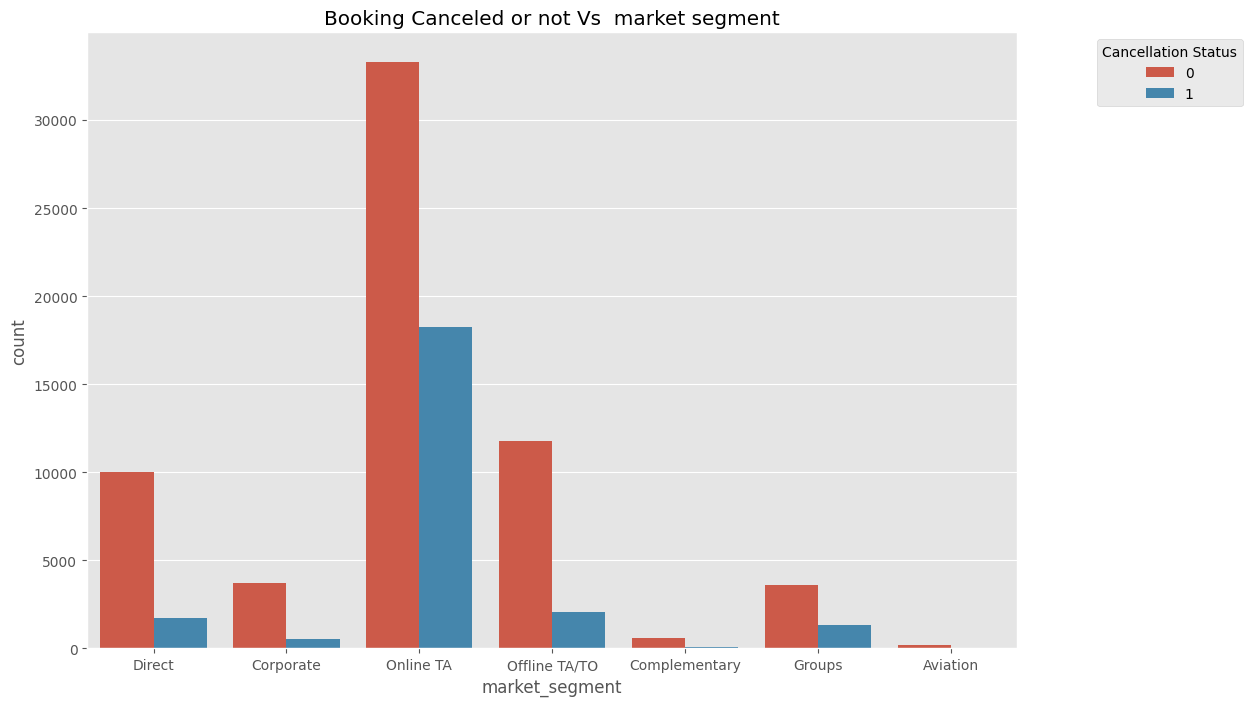

In [ ]:
# MarketSegment Vs Booking Cancelled or not
plt.figure(figsize=(12,8))
# using Seaborn for countplot
sns.countplot(x='market_segment',data=h_df ,hue='is_canceled')
plt.legend(title='Cancellation Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title("Booking Canceled or not Vs  market segment")

The group segment cancelation rate is approximately 50%. The cancellation rate for both online and offline travel agents and tour operators, or TA/TO, is more than 33%.The direct segment has a cancellation rate of less than 20%, which is noteworthy to observe.

##### 1. Why did you pick the specific chart?

Answer:-I have choose count plot because this chart is appropriate for visualizing the count of occurrences of each category (market segment) and distinguishing cancellations (by using the hue parameter for 'is_canceled').

##### 2. What is/are the insight(s) found from the chart?

Answer:-By examining the countplot,

Booking Distribution:we can easily understand the distribution of bookings across different market segments.

Cancellation Patterns: we can easily state that online TA(Travel agent) segment has a higher tendency for cancellations and Direct segment has lower tendency of cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-Yes the gained insight will help in creating a positive impact in business

Positive Business Impact:

Tailoring Strategies: Insights from the chart can help hotels tailor their strategies for different market segments.
Resource Allocation: Allocate resources more efficiently by focusing efforts on segments with higher cancellation rates.

Negative Growth Considerations:

Identifying Risky Segments: If certain market segments consistently show high cancellation rates, it could pose challenges for revenue and resource planning.
Addressing Issues: Insights may lead to the discovery of issues within specific segments, allowing the business to address them for improved customer satisfaction and retention.

#### Chart - 12 Distribution of Visitors by Country

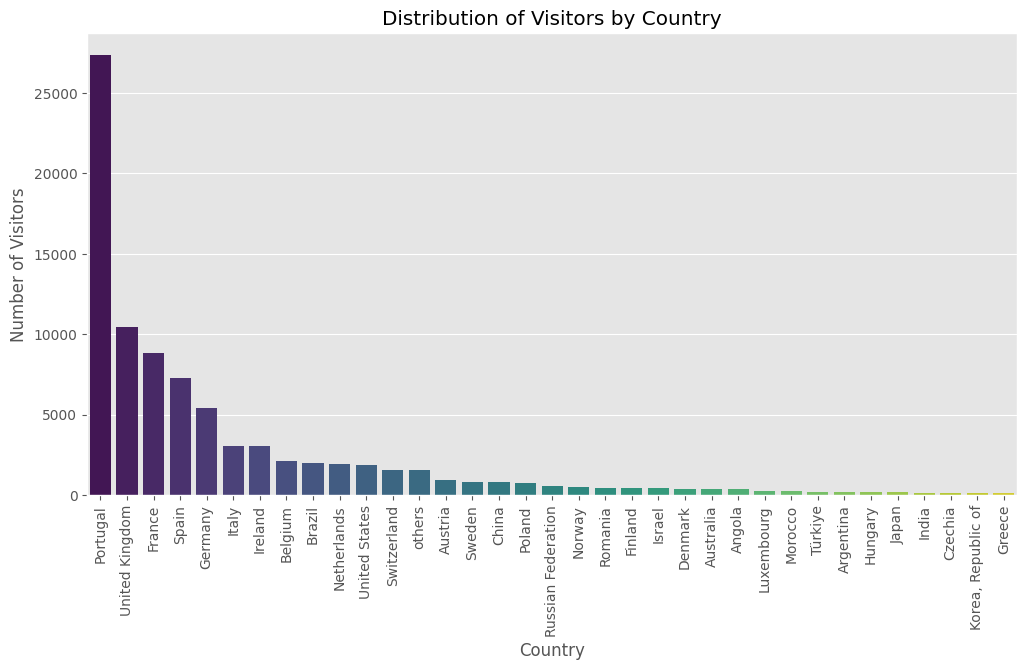

In [ ]:
# Count the occurrences of each country
country_counts = h_df['country_name'].value_counts().head(35)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.title('Distribution of Visitors by Country')
plt.show()

##### 1. Why did you pick the specific chart?

Ans:-
Categorical Data Representation:

A bar chart is an effective choice for visualizing the distribution of categorical data, such as the number of visitors from different countries.

Comparison of Quantities:

The length of each bar makes it easy to compare the number of visitors from each country, providing a clear and straightforward representation of the data.

Ordered Presentation:

The chart is ordered by the number of visitors, allowing quick identification of the most significant contributors.

##### 2. What is/are the insight(s) found from the chart?

Ans:- Insights from the Chart:

Visitor Distribution by Country:

The chart provides a visual representation of the distribution of visitors by country, showcasing the top 35 countries with the highest number of visitors.we can easily from the graph that highest no of visitors are coming from portugal.

Top Visiting Countries:

It's evident which countries contribute the most to the hotel's visitor count, as the heights of the bars represent the number of visitors from each country.

Potential Market Analysis:

The analysis can help identify key markets and regions where the hotel attracts a significant number of visitors. This insight is valuable for marketing and promotional strategies.

Cultural Preferences:

Understanding the origin of visitors can provide insights into cultural preferences, which can be useful for tailoring services, amenities, or marketing campaigns to specific cultural expectations.

##### 3. Will the gained insights help creating a positive business impact?


Ans:- Positive Business Impact:

Targeted Marketing:

Knowing the countries with a high number of visitors allows the hotel to focus marketing efforts on those specific regions. Targeted marketing can lead to increased brand awareness and bookings.

Customized Services:

Insights into cultural preferences can guide the hotel in customizing services to better suit the needs and expectations of visitors from different countries.

Resource Allocation:

The hotel can allocate resources more efficiently by understanding which markets contribute the most to its business. This may include language-specific services, cultural events, or targeted promotions.

#### Chart - 13 Variation of Week Nights and Weekend Nights Stays with respect to each month

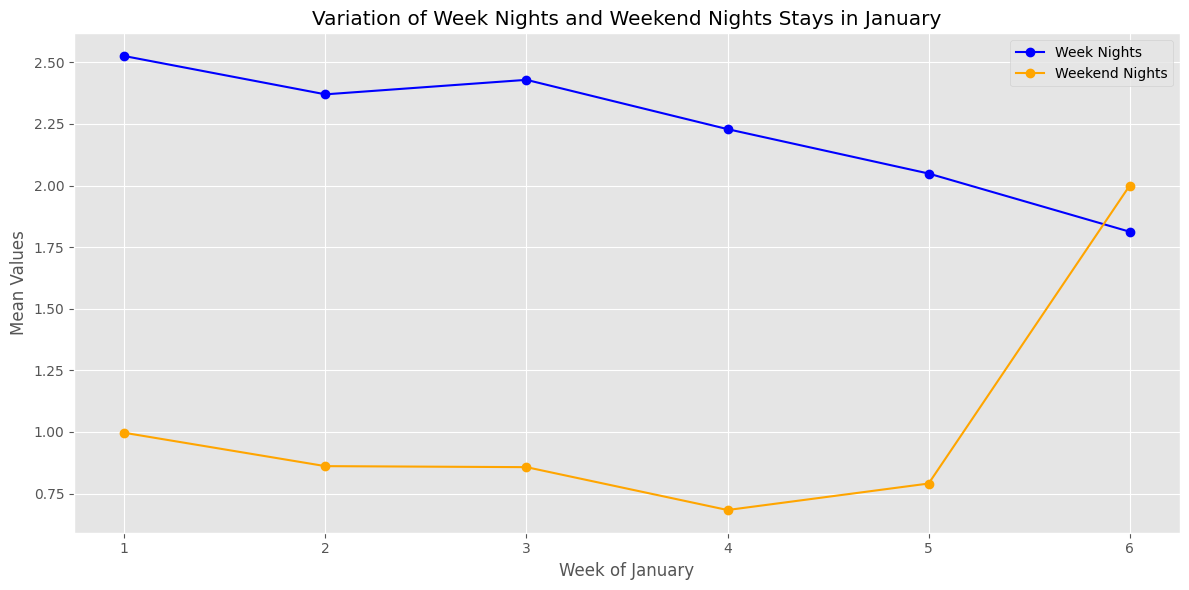

In [ ]:
def plot_weekly_stay_variation(month):
    """
    Plot the variation of stays in week nights and weekend nights throughout the weeks of a specific month.

    Parameters:
    - month: str, the month for which the variation is to be plotted.

    Returns:
    - None (displays the plot).
    """
    # Filter the DataFrame for the specified month
    monthly_data = h_df[h_df['arrival_date_month'] == month]

    # Group by week number and calculate mean values
    weekly_stats = monthly_data.groupby('arrival_date_week_number').agg(
        stays_in_week_nights_mean=('stays_in_week_nights', 'mean'),
        stays_in_weekend_nights_mean=('stays_in_weekend_nights', 'mean'),
    ).reset_index()

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot 'stays_in_week_nights_mean' versus 'stays_in_weekend_nights_mean'
    ax.plot(weekly_stats['arrival_date_week_number'], weekly_stats['stays_in_week_nights_mean'], label='Week Nights', marker='o', linestyle='-', color='blue')
    ax.plot(weekly_stats['arrival_date_week_number'], weekly_stats['stays_in_weekend_nights_mean'], label='Weekend Nights', marker='o', linestyle='-', color='orange')

    # Customize plot labels and title
    plt.xlabel(f'Week of {month}')
    plt.ylabel('Mean Values')
    plt.title(f'Variation of Week Nights and Weekend Nights Stays in {month}')

    # Add a legend for clarity
    plt.legend()

    # Highlight significant points (e.g., peaks or valleys)
    # Example: Highlight weeks with stays_in_weekend_nights_mean above a certain threshold
    threshold = weekly_stats['stays_in_weekend_nights_mean'].quantile(0.75)
    above_threshold = weekly_stats[weekly_stats['stays_in_weekend_nights_mean'] > threshold]
    ax.scatter(above_threshold['arrival_date_week_number'], above_threshold['stays_in_weekend_nights_mean'], color='red', marker='*', label='High Weekend Nights')

    # Add reference lines or annotations if needed

    plt.tight_layout()
    plt.show()

# Example usage
plot_weekly_stay_variation('January')



##### 1. Why did you pick the specific chart?

Answer:- A line plot is chosen because it is suitable for visualizing the variation of stays over time (in this case, weeks). It allows for the identification of trends, patterns, and fluctuations.

##### 2. What is/are the insight(s) found from the chart?

Answer:-
Comparison of Week Nights and Weekend Nights:

The chart allows for a clear comparison between the mean values of stays in week nights and weekend nights throughout the weeks of the specified month.

Identification of Peaks or Valleys:

The red markers highlight weeks with stays_in_weekend_nights_mean above a certain threshold, helping identify periods with significantly high weekend stays.

Seasonal Trends or Patterns:

By observing the line plot, one can potentially identify seasonal trends or patterns in the stays throughout the month, providing insights into booking behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-

Positive Business Impact:

Optimizing Resource Allocation:

Understanding the weekly variation in stays can help optimize resource allocation, such as staffing levels and housekeeping, based on the expected demand during different weeks.

Marketing Strategies:

Insights into high weekend stays can be leveraged for targeted marketing strategies or promotions to attract more weekend bookings.

Customer Experience:

By understanding when guests prefer longer stays during the week or weekends, the hotel can tailor services to enhance the overall customer experience.


Potential Negative Growth:

Identifying Low-Performing Periods:

If there are consistent dips or low values in stays throughout the weeks, it could indicate periods of low demand. This information might prompt the hotel to explore marketing initiatives or promotions to stimulate bookings during these periods.

Addressing Issues with Weekend Stays:

If the highlighted 'High Weekend Nights' show a declining trend, it might indicate a negative growth in weekend stays. The hotel might need to investigate reasons behind this decline, such as competition or changes in customer preferences.

## **Multi-Variate Analysis:-**

#### Chart - 14 - Correlation Heatmap of Numeric Variables

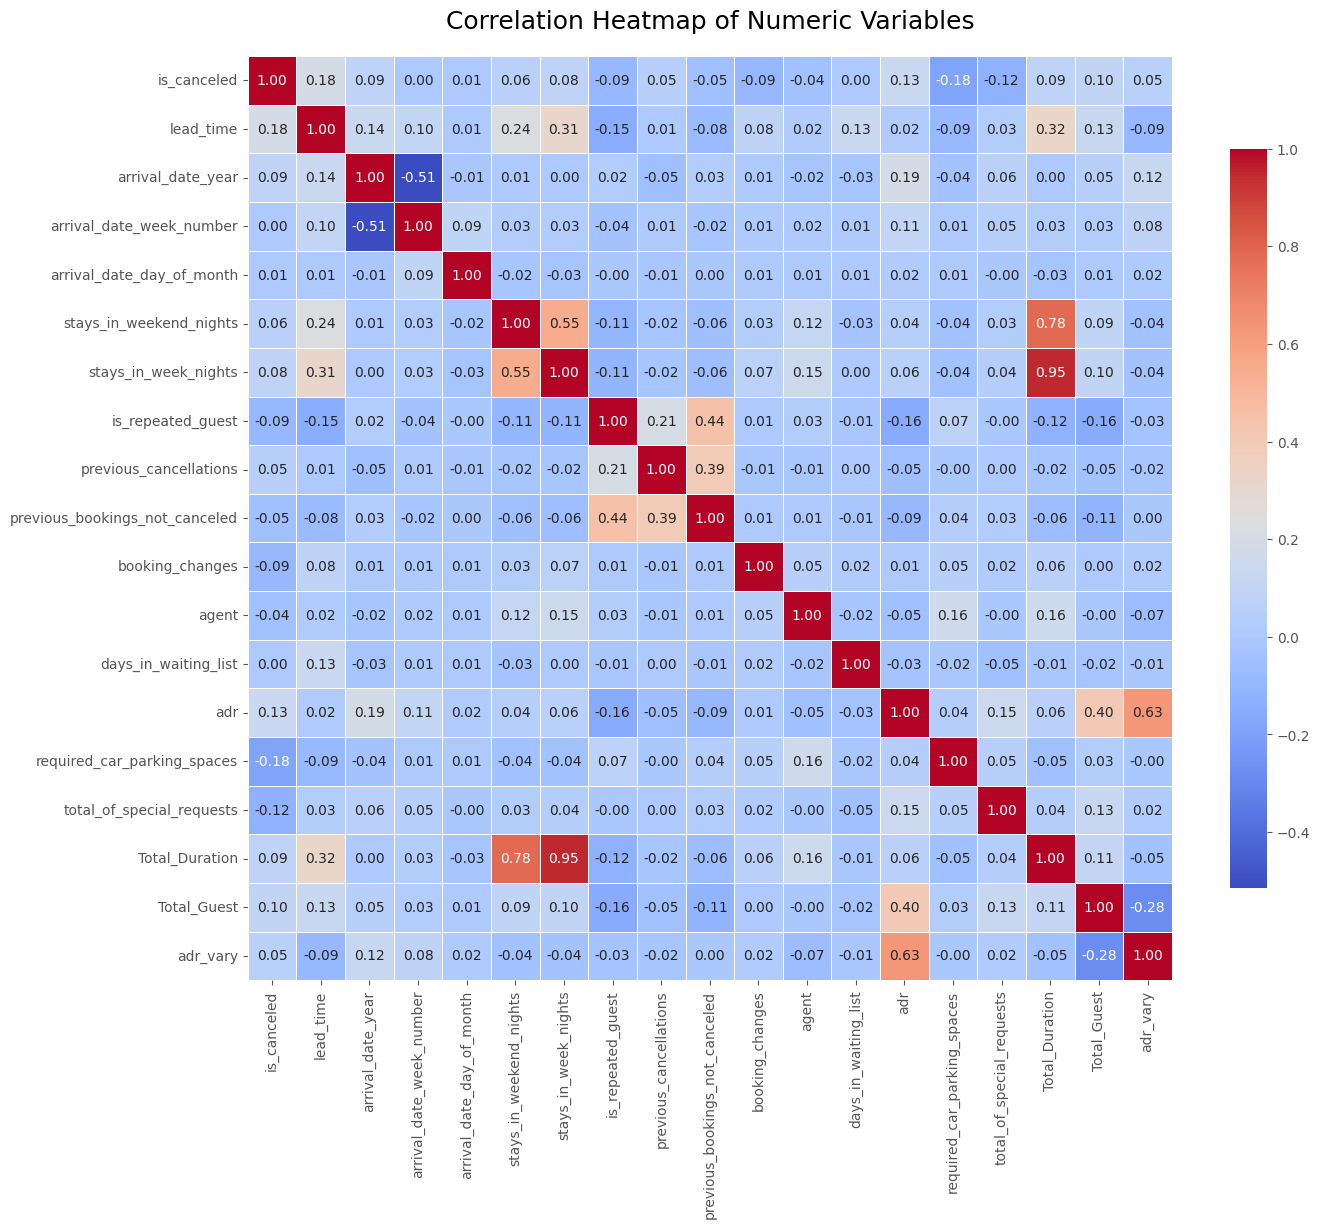

In [ ]:
# Correlation Heatmap visualization code
# Drop non-numeric columns for correlation matrix
numeric_columns = h_df.select_dtypes(include=[np.number])

# Create correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using seaborn
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,  # Display a square-shaped heatmap
    fmt=".2f",    # Format the annotation to two decimal places
    annot_kws={"size": 10},  # Adjust the font size of annotations
    cbar_kws={"shrink": 0.8},  # Adjust the color bar size
)

# Add a title
heatmap.set_title('Correlation Heatmap of Numeric Variables', pad=20, size=18)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer:- The correlation heatmap is chosen because it visually represents the strength and direction of relationships between numeric variables in your dataset. It's a valuable tool for understanding how different features correlate with each other, which can provide insights into potential patterns or dependencies.

##### 2. What is/are the insight(s) found from the chart?

Answer:-High positive correlation values (close to 1) indicate a strong positive relationship, while high negative correlation values (close to -1) indicate a strong negative relationship. Values close to 0 suggest a weak or no correlation.

Analyzing the heatmap, we can identify pairs of variables that have strong correlations. For example, a positive correlation between 'stays_in_weekend_nights' and 'stays_in_week_nights' may suggest that guests who stay more on weekends also tend to stay more on weekdays. also Total_Duration and stays_in_week_nights and stays_in_weekend_night has strong correlation.

3.Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

 Answer:-

 Potential Positive Business Impact:

Understanding correlations can help in making informed decisions for business strategies. For instance:
If certain features are highly positively correlated, promoting one might positively impact the other. For example, offering promotions for longer stays on weekends and weekdays together could be a successful strategy.
Identifying features with a strong negative correlation may help in optimizing resources. For instance, if 'lead_time' and 'is_repeated_guest' have a negative correlation, focusing on marketing efforts to attract repeated guests might lead to shorter lead times and quicker bookings.

Negative Growth Insights:

Negative correlation values may not necessarily lead to negative growth but can highlight trade-offs or dependencies between variables. For example:
If 'required_car_parking_spaces' and 'total_of_special_requests' have a negative correlation, it suggests that guests who request more special services may be less likely to require parking spaces. This information can guide resource allocation or service customization.

#### Chart - 15 - Pair Plot Pair Plots for Hotel Booking Analysis

In [ ]:
# Define the columns to plot
columns_to_plot = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'Total_Guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                   'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                   'total_of_special_requests']

# Subset the DataFrame with selected columns
subset_df = h_df[columns_to_plot]

# Convert 'is_canceled' column to categorical for better visualization
subset_df['is_canceled'] = subset_df['is_canceled'].astype('category')

# Set style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create pair plots with optimized parameters
plot = sns.pairplot(subset_df, hue='is_canceled', markers=['o', 's'], palette='husl', plot_kws={'alpha': 0.5})

# Customize titles and labels
plot.fig.suptitle("Pair Plots for Hotel Booking Analysis", y=1.02)
plot.set(xlabel='X-axis Label', ylabel='Y-axis Label')

# Display the plot
plt.show()

NameError: ignored

##### 1. Why did you pick the specific chart?

Answer:- Pair plots are chosen because we are trying to visualize relationships between pairs of numerical variables. In the context of hotel booking analysis, it's a good choice to understand how different numerical features correlate with each other, and how these relationships may vary based on the cancellation status.



##### 2. What is/are the insight(s) found from the chart?

Answer:-
Lead Time vs. Cancellation: Check if there is a clear pattern or separation between lead time and cancellation status. Higher lead times may have a different distribution for cancellations compared to shorter lead times.

Stays in Weekend/Nights vs. Stays in Week/Nights:

Explore how the length of stays on weekends and weekdays relates to cancellations. Are longer stays more likely to be canceled?

Total Guests vs. Cancellation:

Investigate if the total number of guests (adults, children, babies) influences the likelihood of cancellation.

Previous Cancellations vs. Bookings Not Canceled:

Understand the relationship between the history of cancellations and the bookings that were not canceled. This may provide insights into customer behavior.

Booking Changes vs. Cancellation:

Analyze how changes to bookings relate to the likelihood of cancellations.

3.Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Answer:-
Positive Business Impact:

Better Planning:

Understanding patterns in lead time and booking changes can help in better resource planning and allocation.

Customer Service Optimization:

Insights into the factors influencing cancellations can guide customer service strategies, potentially reducing cancellations.

Potential Negative Growth:


High Cancellation Rates:

If the pair plots reveal a consistent pattern of high cancellations under certain conditions, it could indicate a need to address issues related to those conditions (e.g., pricing, policies, customer satisfaction).

Complex Booking Changes:

If booking changes are associated with higher cancellations, it might indicate that customers find the booking process complex or restrictive, leading to negative growth.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***